<h1><center>Star Wars Survey</center></h1>

While waiting for the movie to arrive: *Star Wars: The Force Awakens*, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in the survey about *Star Wars* fans. In particular, they wondered: Male or Female: who is the fan of Star Wars franchise? Does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch? Which characters are most well-liked and most hated? And who shot first, Han Solo or Greedo?

<img src="https://media.gettyimages.com/photos/space-exploration-and-planetary-colonization-picture-id501940544?k=20&m=501940544&s=612x612&w=0&h=YXiNAtSZZiMv5Bo_b3Bet9A5O0w0qfLfjzbJJ3WbmMA="/>

*Source*: [gettyimages](https://www.gettyimages.com/)

The team used the online tool SurveyMonkey to collect the data from *Star War* fans. The survey received 1,186 responses from June 3 to 6, which are available on [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## 1. Project and Data Overview

For this project, we'll clean and explore the dataset to analyze the fan's responses we got about the Star Wars franchise and the movie itself.

from Star Wars fans.

The dataset has several columns, including the following:

- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - the respondent's gender
- `Age` - the respondent's age
- `Household Income` - the respondent's income
- `Education` - the respondent's eduction level
- `Location (Census Region)` - the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise` - a `Yes` or `No` respone
- `Do you consider yourself to be a fan of the Star Wars film franchise` - a `Yes` or `No` response

There are several other columns containing answers to questions aobut the *Star Wars* movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

## 2. Import Libraries and Load the Dataset

We need to specify an `encoding=ISO-8859-1`, because the dataset has some characters that aren't in Python's default `utf-8` encoding.

Let's import the required libraries and read in the data to explore.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

In [2]:
# Read the data
star_wars = pd.read_csv('StarWars.csv', encoding='ISO-8859-1')

# Display number of total rows and columns
print(f'Total number of rows: {star_wars.shape[0]}')
print(f'Total number of columns: {star_wars.shape[1]}')

# Explore the data by viewing first ten rows
star_wars.head(10)

Total number of rows: 1186
Total number of columns: 38


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
# View the column names
star_wars.columns.tolist()

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

The dataset contains 1186 rows and 38 columns. Note many columns are not descriptive (i.e., `Unnamed`). These columns might be the questions in which the respondent had to check one or more boxes. It's only our assumption at the moment, and we'll find out about them as we make progress in the project.

## 3. Data Cleaning

There is quite a bit of inconsistency in the data that needs cleaning.

### 3.1 Convert Data Type of Second and Thrid columns to Boolean

Take a look at the following two columns:

- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be `NaN` where a repondant chooses not a answer a question. We can use the [pandas.Series.value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Let's see the values frequency in these columns:

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Next, let's find out what is the data type of these columns using [pandas.Series.dtype](https://pandas.pydata.org/docs/reference/api/pandas.Series.dtype.html):

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].dtype

dtype('O')

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].dtype

dtype('O')

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later be converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the [pandas.Series.map()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) method on series objects to perform the conversion.

For example, imagine we have a series that looks like this:

```python
series = ["Yes", "No", NaN, "Yes"]
```

We can use a dictionary to define a mapping from each value in `series` to a new value:

```python
yes_no = {
    "Yes": True,
    "No": False
}
```

Then, we can call the map() function to perform the mapping:

```python
series = series.map(yes_no)
```

`series` will look like this:

```python
[True, False, NaN, True]
```

Let's perform these actions on `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` columns:

In [8]:
# Create a dictionary of boolean where 'Yes' is 'True' and
# 'No' is 'False'
yes_no = {
    'Yes': True,
    'No': False
}

# Call series 'map()' function to perform the mapping
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [9]:
# View the values of these columns after performing the mapping
display(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
display(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### 3.2 Manipulate and Redefine the Columns About Watched Star Wars Films

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` - whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`. 
- `Unnamed: 5` - whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`. 
- `Unnamed: 6` - whether or not the respondent saw `Star Wars: Episode IV A New Hope`. 
- `Unnamed: 7` - whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`. 
- `Unnamed: 8` - whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

For example, imagine we had this column series:

```python
["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]
```

We could convert the values using this mapping dictionary:

```python
{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}
```

After calling the `map()` method on a series, the column should only contain the values `True` and `False`.

We have to be very careful with spacing when constructing our mapping dictionary! In the cells, `Star Wars: Episode I  The Phantom Menace` has two spaces between the end of `Episode I` and the start of `The Phantom`, but this isn't the case in `Star Wars: Episode VI Return of the Jedi`. We'll check the values in the cells carefully to make sure the appropriate spacing is being used.

In [10]:
# Create dictionary to perform mapping on repective values
mapping_dict = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

# Convert each column above so that it only contains the values
# 'True' and 'False'
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(mapping_dict)

Next, we'll need to rename the above columns to reflect what they represent. We can use the [pandas.DataFrame.rename()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) method on DataFrames to do this.

We'll rename each of the columns so the names are more intuitive. The intutition we would like to use so `seen_1` to indicate whether the respondent saw `Star Wars: Episode I The Phantom Menace`, `seen_2` for `Star Wars: Episode II Attack of the Clones`, and so on.

In [11]:
# Display columns to rename
cols_to_rename = star_wars.columns[3:9].tolist()
cols_to_rename

['Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8']

In [12]:
# Create a dictionary of columns to rename
cols_dict = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}

# Rename the above columns
star_wars.rename(columns=cols_dict, inplace=True)

In [13]:
# Display results 
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


### 3.3 Redefine and Change Data Type of Ranking Columns

The next six columns ask the respondent to rank the *Star Wars* movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

We can do the numeric conversion with the [pandas.DataFrame.astype()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html) method on DataFrames, like so:

In [14]:
# Convert each of the columns above to a 'float' type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype('float')

# Columns dict to rename
cols_dict2 = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}

# Rename columns using 'cols_dict2'
star_wars.rename(columns=cols_dict2, inplace=True)

# Display first few rows of 'ranking' columns
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


### 3.4 Clean the Character Columns

We have 14 columns that contain the data on the characters respondents view from favorably to unfavorably. Below are the columns representing the respective character name:

- `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` - How the respondent rate to `Han Solo`
- `Unnamed: 16` - How the respondent rate to `Luke Skywalker`
- `Unnamed: 17` - How the respondent rate to `Princess Leia Organa`
- `Unnamed: 18` - How the respondent rate to `Anakin Skywalker`
- `Unnamed: 19` - How the respondent rate to `Obi Wan Kenobi`
- `Unnamed: 20` - How the respondent rate to `Emperor Palpatine`
- `Unnamed: 21` - How the respondent rate to `Darth Vader`
- `Unnamed: 22` - How the respondent rate to `Lando Calrissian`
- `Unnamed: 23` - How the respondent rate to `Boba Fett`
- `Unnamed: 24` - How the respondent rate to `C-3PO`
- `Unnamed: 25` - How the respondent rate to `R2 D2`
- `Unnamed: 26` - How the respondent rate to `Jar Jar Binks`
- `Unnamed: 27` - How the respondent rate to `Padme Amidala`
- `Unnamed: 28` - How the respondent rate to `Yoda`

Let's rename these column and make them descriptive for analysis.

In [15]:
# Dict of column and character names for replacement
char_dict = {
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
    "Unnamed: 16": "Luke Skywalker", 
    "Unnamed: 17": "Princess Leia Organa",
    "Unnamed: 18": "Anakin Skywalker",
    "Unnamed: 19": "Obi Wan Kenobi",
    "Unnamed: 20": "Emperor Palpatine",
    "Unnamed: 21": "Darth Vader",
    "Unnamed: 22": "Lando Calrissian",
    "Unnamed: 23": "Boba Fett",
    "Unnamed: 24": "C-3PO",
    "Unnamed: 25": "R2 D2",
    "Unnamed: 26": "Jar Jar Binks",
    "Unnamed: 27": "Padme Amidala",
    "Unnamed: 28": "Yoda"}

# Rename the above columns using 'char_dict'
star_wars.rename(columns=char_dict, inplace=True)

Let's look at these columns after renaming them.

In [16]:
star_wars.iloc[:, 15:29].head(3)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3PO,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)


The values in these columns are categorical, so it will be harder to work with them. One way to handle these columns is to replace their values and rank them by numbers. Like so:

- `Very favorably`: 1
- `Somewhat favorably`: 2
- `Neither favorably nor unfavorably (neutral)`: 3
- `Unfamiliar (N/A)`: 4
- `Somewhat unfavorably`: 5
- `Very unfavorably`: 6

We'll make a dictionary `favorable_dict` and map with the `star_wars` dataframe to replace the values in the characters columns.

In [17]:
# Create the dict to store the above values
favorable_dict = {"Very favorably": 1,
                  "Somewhat favorably": 2,
                  "Neither favorably nor unfavorably (neutral)": 3,
                  "Unfamiliar (N/A)": 4,
                  "Somewhat unfavorably": 5,
                  "Very unfavorably": 6}

# Create a list of characters
char_cols = star_wars.columns[15:29]

# Mapping 'favorable_dict' to replace values in 'char_cols'
for col in star_wars[char_cols]:
    star_wars[col] = star_wars[col].map(favorable_dict)
    
# View results
star_wars[char_cols].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3PO,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0
4,1.0,2.0,2.0,5.0,1.0,6.0,2.0,3.0,1.0,2.0,2.0,6.0,2.0,2.0


This representation of columns is helpful for our analysis. We'll explore this in the next section.

## 4. Data Analysis and Visualization

Now we have the clean data to explore and visualize the results. Let's begin by calculating the mean rankings of the movie.

### 4.1 Overall Ranking of Star War Movies

We can find the highest-ranked movie quicker. To do this, take the mean of each ranking columns using the [pandas.DataFrame.mean()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) method on DataFrames.

In [18]:
# Create list of ranking columns
ranking_cols = star_wars.columns[9:15]

# Compute the mean of each 'ranking' columns
mean_ranking = star_wars[ranking_cols].mean()
mean_ranking

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Let's also create a bar graph to visualize these results.

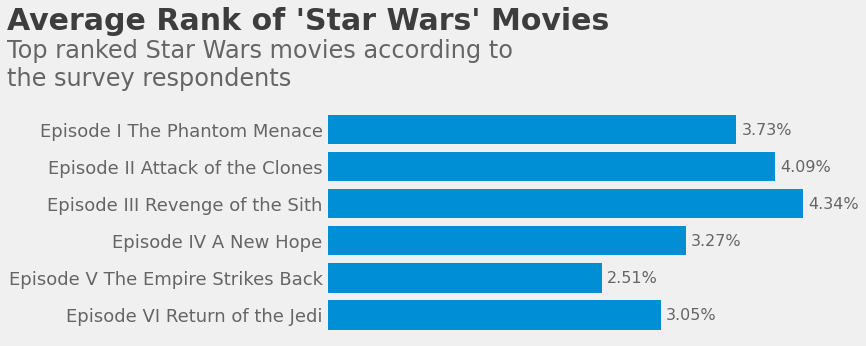

In [19]:
# Set graph style
style.use('fivethirtyeight')

# Create figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 4))

# Plot horizontal bar graph of 'ranking_mean' (sort index in descending order)
mean_ranking.sort_index(ascending=False).plot(kind='barh', ax=ax, width=0.8)
ax.grid(False)
ax.set_xticks([])
# Create ylabels list
ylabels = ['Episode I The Phantom Menace', 'Episode II Attack of the Clones',
           'Episode III Revenge of the Sith', 'Episode IV A New Hope',
           'Episode V The Empire Strikes Back', 'Episode VI Return of the Jedi']
ax.set_yticks(ax.get_yticks(), fontsize=18, color='#656565', labels=ylabels[::-1]) # access ylabels in reverse order

# Display bar labels
bars = ax.containers[0]
ax.bar_label(bars, label_type='edge', padding=5.0, fontsize=16, color='#656565',
             labels=[f'{value:.2f}%' for value in bars.datavalues])

# Add title
ax.text(x=-2.9, y=7.7, fontsize=30, fontweight='bold', color='#3d3d3d',
       s='Average Rank of \'Star Wars\' Movies')

# Add subtitle
ax.text(x=-2.9, y=6.2, fontsize=24, color='#656565',
       s='Top ranked Star Wars movies according to\nthe survey respondents')

plt.show()

According to the movies ranking, the lowest score indicates the most favorite, and the highest score is the least favorite movie. So if we look at the results above, `ranking_5` seems to be the most favorite movie that represents the movie `Episode V The Empire Strikes Back`. On the other hand, the lowest rank movie is the `Episode III Revenge of the Sith` from `ranking_3` column.

### 4.2 In Terms of Gender Who is the Biggest Fan?

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
- `Do you consider yourself to be a fan of the Star Trek franchise?` - `Yes` or `No`
- `Gender` - `Male` or `Female`

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the `Gender` column like this:

```python
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
```

The subset allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

Let's split the data into two gender groups based on the `Gender` column.

In [20]:
# Make subset of 'males' and 'females' groups from 'Gender' column
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

# Calculate the movies ranking in 'males' and 'females' groups 
males_ranking_mean = males[ranking_cols].mean()
females_ranking_mean = females[ranking_cols].mean()

# Create a list of seen columns in 'star_wars' dataset
seen_cols = star_wars.columns[3:9]

# Calculate the percentage of each movie seen in
# 'males' and 'females' groups 
males_seen_per = round(males[seen_cols].mean() * 100, 1)
females_seen_per = round(females[seen_cols].mean() * 100, 1)

# Display results
print(f'\033[1mMales movies ranking\033[0m:\n{males_ranking_mean}\n')
print(f'\033[1mFemales movies ranking\033[0m:\n{females_ranking_mean}\n')
print(f'\033[1mMales percentage of each seen movie\033[0m:\n{males_seen_per}\n')
print(f'\033[1mFemales percentage of each seen movie\033[0m:\n{females_seen_per}')

Males movies ranking:
ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

Females movies ranking:
ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

Males percentage of each seen movie:
seen_1    72.6
seen_2    65.0
seen_3    63.8
seen_4    68.8
seen_5    78.9
seen_6    77.9
dtype: float64

Females percentage of each seen movie:
seen_1    54.3
seen_2    43.2
seen_3    40.4
seen_4    46.4
seen_5    64.3
seen_6    61.6
dtype: float64


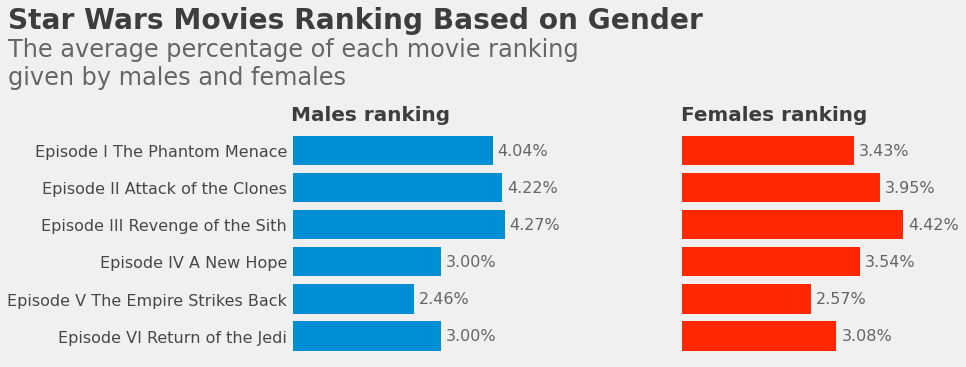

In [21]:
# Define figure and axes for subplots (sharing x-axis)
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), sharex=True)

# Create a horizontal bar plot for 'males_ranking_mean'
males_ranking_mean.sort_index(ascending=False).plot(kind='barh', left=-1, ax=ax[0], width=0.8, color='#008fd5')
# Add title for males ranking
ax[0].set_title('Males ranking', fontsize=20, fontweight='bold', color='#3d3d3d', loc='left')
# Disable grid and xticks
ax[0].grid(False)
ax[0].set_xticks([])
# Set ylabels
ax[0].set_yticks(ax[0].get_yticks(), fontsize=16, alpha=0.7, labels=ylabels[::-1])
# Get bar container
bars = ax[0].containers[0]
# Add bar labels
ax[0].bar_label(bars, label_type='edge', padding=5.0, fontsize=16, color='#656565',
                labels=[f'{value:.2f}%' for value in bars.datavalues])


# Create a horizontal bar plot for 'females_ranking_mean'
females_ranking_mean.sort_index(ascending=False).plot(kind='barh', ax=ax[1], width=0.8, color='#ff2700')
# Add title for females ranking
ax[1].set_title('Females ranking', fontsize=20, fontweight='bold', color='#3d3d3d', loc='center')
# Disable grid, xticks, and yticks
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
# Get bar2 container
bars2 = ax[1].containers[0]
# Add bar2 labels
ax[1].bar_label(bars2, label_type='edge', padding=5.0, fontsize=16, color='#656565',
                labels=[f'{value:.2f}%' for value in bars2.datavalues])

# Add main title
ax[0].text(x=-6.65, y=8.3, s='Star Wars Movies Ranking Based on Gender', fontsize=28, fontweight='bold', color='#3d3d3d')

# Add subtitle
ax[0].text(x=-6.65, y=6.8, s='The average percentage of each movie ranking\ngiven by males and females', fontsize=24, color='#656565')

plt.show()

The average value of ranking columns follow the same pattern for both male and female groups, eventhough differ in the frequency count. The highest-ranked movie is "Episode III Revenge of the Sith" between males and females with `4.27%` and `4.42%` respectively. Whereas, the lowest-ranked movie is "Episode V The Empire Strikes Back" scoring `2.46%` for males and `2.57%` for females.

Let's find the most viewed movie for each group.

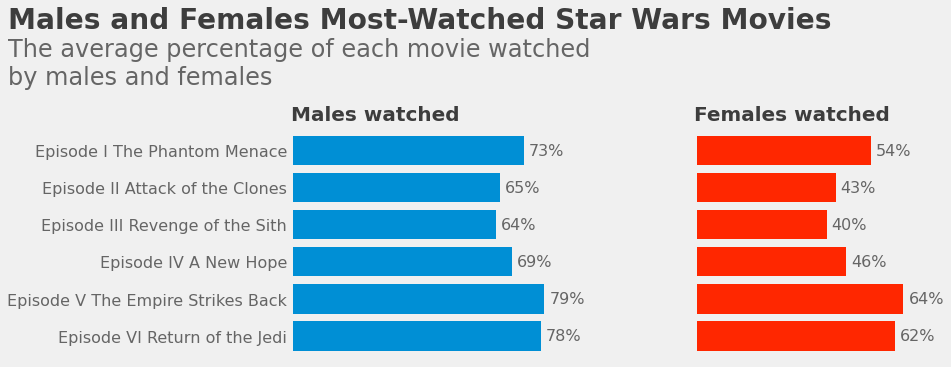

In [22]:
# Define figure and axes for subplots (sharing x-axis)
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), sharex=True)

# Create a horizontal bar plot for 'males_seen_per' (also sort the index)
males_seen_per.sort_index(ascending=False).plot(kind='barh', left=-20, ax=ax[0], width=0.8, color='#008fd5')
ax[0].set_title('Males watched', fontsize=20, fontweight='bold', color='#3d3d3d', loc='left')
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks(ax[0].get_yticks(), fontsize=16, color='#656565', labels=ylabels[::-1])

# Add labels to the bars
bars = ax[0].containers[0]
ax[0].bar_label(bars, label_type='edge', padding=5.0, fontsize=16, color='#656565',
                labels=[f'{value:.0f}%' for value in bars.datavalues])


# Create a horizontal bar plot for 'females_seen_per'
females_seen_per.sort_index(ascending=False).plot(kind='barh', ax=ax[1], width=0.8, color='#ff2700')
ax[1].set_title('Females watched', fontsize=20, fontweight='bold', color='#3d3d3d', loc='center', x=0.56)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
bars2 = ax[1].containers[0]
ax[1].bar_label(bars2, label_type='edge', padding=5.0, fontsize=16, color='#656565',
                labels=[f'{value:.0f}%' for value in bars2.datavalues])

# Add main title
ax[0].text(x=-108, y=8.3, s='Males and Females Most-Watched Star Wars Movies', fontsize=28, fontweight='bold', color='#3d3d3d')

# Add subtitle
ax[0].text(x=-108, y=6.8, s='The average percentage of each movie watched\nby males and females', fontsize=24, color='#656565')

plt.show()

There is significant difference between high-ranked and most-viewed movies among the two groups. We expected to have positive correlation between ranked and most-watched movies but that is not the case here. Rather, the most-watched movie is "Episode V The Empire Strikes Back" making it `79%` and `64%` between male and female group. On the other hand, we see that "Episode III Revenge of the Sith" is not so famous movie. `64%` males and `40%` females watched that movie.

From these results we can say that it is not necessarily obvious that the highest-ranked moive is also the most-viewed as well and vice versa.

We notice that a large number of male group watched the Star Wars movies as compare to female group. Does that mean males are more interested in Star Wars moives than females? Let's find this out next.

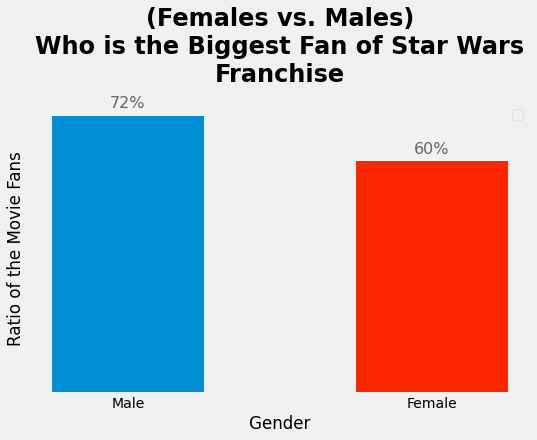

In [23]:
# Calculate the percentage of male and female fans of the Star Wars franchise
fan_col = "Do you consider yourself to be a fan of the Star Wars film franchise?"
star_wars_gen_fans = star_wars.groupby('Gender')[fan_col].agg(np.mean)
star_wars_gen_fans_per = star_wars_gen_fans * 100

# Reset index and sort values by 'Gender' in descending order
star_wars_gen_fans_per = star_wars_gen_fans_per.reset_index().sort_values(by='Gender', ascending=False)

# Create a bar graph of females and males to visualize who likes star wars the most
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.bar(star_wars_gen_fans_per['Gender'], star_wars_gen_fans_per[fan_col], width=0.5, color=['#008fd5', '#ff2700'])
ax.set_title('(Females vs. Males)\nWho is the Biggest Fan of Star Wars\nFranchise', fontsize=24, fontweight='bold', y=1.05)
ax.legend([])
ax.grid(False)
ax.set(xticks=[0, 1], label=['Male', 'Female'], alpha=0.7)
ax.set_yticks([])
ax.set_xlabel('Gender')
ax.set_ylabel('Ratio of the Movie Fans')
bars = ax.containers[0]
ax.bar_label(bars, label_type='edge', padding=5.0, fontsize=16, color='#656565',
             labels=[f'{value:.0f}%' for value in bars.datavalues])

plt.show()

`72%` of male respondents identified as a fan of Star Wars movies, compared to `60%` of female respondents. The Star Wars movies appear to be more popular with a male audience. Hence why it is strongly related to the most-viewed movies based on gender where we can also see the male group has a higher percentage than the female group.

### 4.3 Which Movies Have Been Watched the Most?

Another interesting part of the survey would be to find the probability of how many respondents have seen any of the Star Wars film and to figure out which movie is most-watched. To calculate the average percentage of the each movie we can use [pandas.DataFrame.any()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) which returns a series whether any element in the `seen` columns is True, otherwise returns False. 

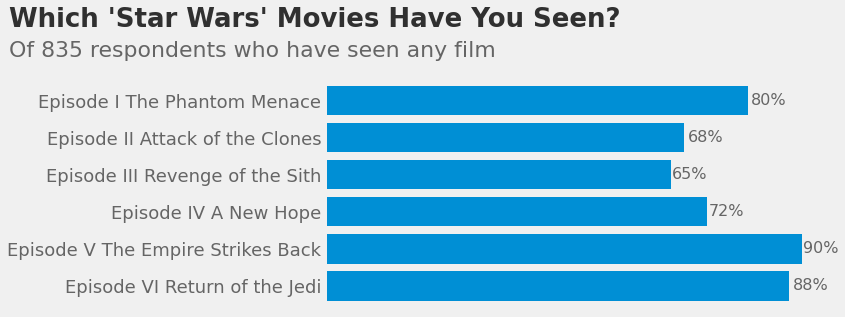

In [24]:
# Create boolean mask for any element is True in 'seen_cols'
seen_any_bool = star_wars[seen_cols].any(axis=1)

# Create subset dataframe based on 'seen_any_bool'
seen_any_df = star_wars[seen_any_bool]

# Calculate average percentage of the each movie in 'seen_any_df'
seen_any_movie = seen_any_df[seen_cols].mean() * 100

# Make a barh graph to visualize the results
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
fig = seen_any_movie.sort_index(ascending=False).plot(kind='barh', ax=ax, width=0.8)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks(ax.get_yticks(), fontsize=18, color='#656565', labels=ylabels[::-1])

# Set bar labels
barlabels_ycoords = 4.9 # starting point of y-axis coordinates for first label
# Iterate through the length of the 'seen_any_movie' Series
for bar in range(len(seen_any_movie)):
    # Extract the value at the current position and convert float data type to int
    current_xcoord = int(seen_any_movie.iloc[bar])
    # Create a text label from the current value
    current_label = str(current_xcoord)
    
    # Dynamically generated current_* variables to draw the label
    ax.text(x=current_xcoord+1, y=barlabels_ycoords, s=current_label+'%',
            fontsize=16, color='#656565')
    barlabels_ycoords -= 1

# Add title
ax.text(x=-60, y=7, s='Which \'Star Wars\' Movies Have You Seen?', fontsize=26, fontweight='bold', alpha=0.8)

# Add subtitle
ax.text(x=-60, y=6.2, s='Of 835 respondents who have seen any film', fontsize=22, color='#656565')

plt.show()

Out of 835 repondents, we can see that "Episode V The Empire Strikes Back" is the film seen by the most number of people, followed by "Episode VI Return of the Jedi". Shockingly, more people reported seeing "Episode I The Phantom Menance" than the original "Star Wars" (renamed "Episode IV A New Hope").

### 4.4 Respondents Who Have Watch All Six Movies

Let's see which movie is the best. In order to calculate how many respondents have seen all of the Star Wars movies we'll use [pandas.DataFrame.all()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.all.html) method. The method returns whether all element are True in the `seen` columns, otherwise it returns False.

In [25]:
# Create boolean mask for all element is True in 'seen_cols'
seen_all_bool = star_wars[seen_cols].all(axis=1)

# Create subset dataframe based on 'seen_all_bool'
seen_all_df = star_wars[seen_all_bool]

print(f'\033[1mNumber of people who have seen all six movies\033[0m:\n{len(seen_all_df)}')

Number of people who have seen all six movies:
471


We can see that only 471 out of  1186 respondents have seen all six Star Wars movies, which is a significant drop in numbers.

We'll now calculate the share of respondents who rated each movie as their favorite. First, we'll loop through the `ranking` columns in the `seen_all_df` dataframe and filter the best movies (i.e., rated as `1.0`) in each ranking column. Second, we'll take out the ranking percentage and store these values in the `movies_dict` dictionary with the corresponding key as the movie name.

In [26]:
# Create a list to movie names
movies = ['Episode I The Phantom Menace',
          'Episode II Attack of the Clones',
          'Episode III Revenge of the Sith',
          'Episode IV A New Hope',
          'Episode V The Empire Strikes Back',
          'Episode VI Return of the Jedi']

# Create dictionary to store movies and their ranking percentage
movies_dict = {}

for i, ranking in enumerate(seen_all_df[ranking_cols]):
    # filter only the best movies (i.e., #1)
    first_rank_movies = seen_all_df[ranking] == 1
    movies_dict[movies[i]] = round((first_rank_movies).mean() * 100, 0)

# Convert 'movies_dict' to pandas Series for flexibility
best_movies = pd.Series(movies_dict)
best_movies

Episode I The Phantom Menace         10.0
Episode II Attack of the Clones       4.0
Episode III Revenge of the Sith       6.0
Episode IV A New Hope                27.0
Episode V The Empire Strikes Back    36.0
Episode VI Return of the Jedi        17.0
dtype: float64

We have the best movie ratings from 471 respondents. Let's visualize the result we just derived.

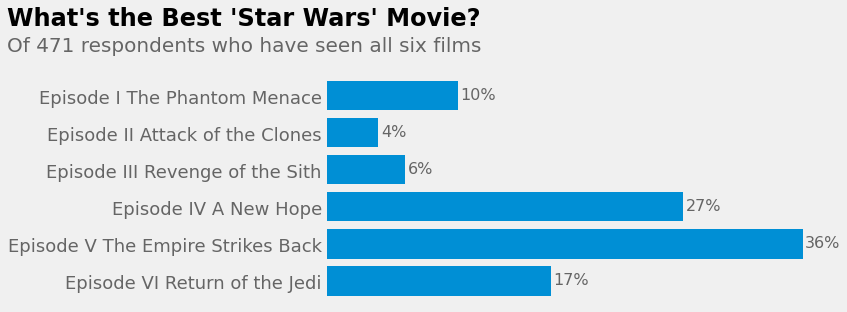

In [27]:
# Make a barh graph to visualize the results
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
fig = best_movies.sort_index(ascending=False).plot(kind='barh', ax=ax, width=0.8)
ax.grid(False)
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=18, labelcolor='#656565')

# Set bar labels
barlabels_ycoords = 4.9

for bar in range(len(best_movies)):
    current_xcoord = int(best_movies.iloc[bar])
    current_label = str(current_xcoord)
    
    ax.text(x=current_xcoord+0.2, y=barlabels_ycoords, s=current_label+'%',
           fontsize=16, color='#656565')
    barlabels_ycoords -= 1
    
# Add title
ax.text(x=-24, y=6.9, s='What\'s the Best \'Star Wars\' Movie?', fontsize=24, fontweight='bold')

# Add subtitle
ax.text(x=-24, y=6.2, s='Of 471 respondents who have seen all six films', fontsize=20, color='#656565')

plt.show()

471 respondents who indicated they have seen every "Star Wars" movie, rank `Episode V The Empire Strikes Back` as their favorite and `Episode II Attack of the Clones` as the worst movie. 36% of the people consider episode V the best of all, whereas only 4% said their favorite is episode II.

We can also drill down and find out, generally, how people rate the movies. Overall, fans broke into two camps: those who prefer the prequels three movies and those who prefer the original three movies. Let's see how fans the giving ratings between these two camps.

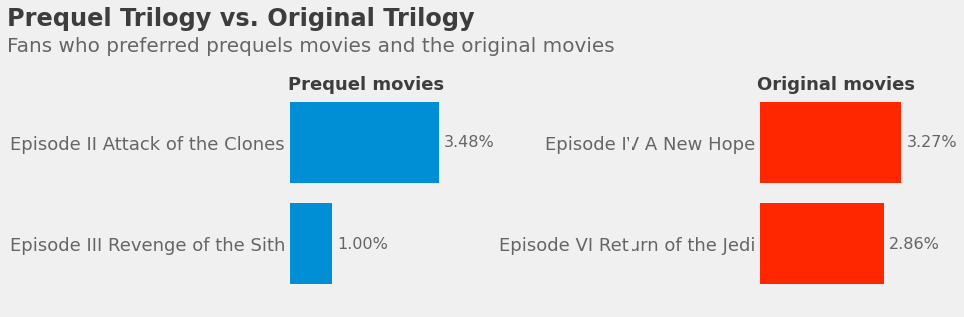

In [28]:
# Filter prequel movies (from 'ranking_1' to 'ranking_3')
# and original moives (from 'ranking_4' to 'ranking_6')
prequel_movies = seen_all_df[ranking_cols[:3]]
original_movies = seen_all_df[ranking_cols[3:]]

# Create the subsets of 'prequel_movies' and 'original_movies' by
# extracting rows where 'ranking_3' and 'ranking_5' is the favorite movies
fav_ep1 = prequel_movies[prequel_movies['ranking_3'] == 1]
fav_ep5 = original_movies[original_movies['ranking_5'] == 1]

# Calculate the mean of 'ranking_2' and 'ranking_3' in 'fav_ep1'
# and 'ranking_4' and 'ranking_6' in 'fav_ep5'
fav_ep1_mean = fav_ep1.loc[:, ['ranking_2', 'ranking_3']].mean()
fav_ep5_mean = fav_ep5.loc[:, ['ranking_4', 'ranking_6']].mean()

# Define figure and axes for subplots
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), sharex=True)

# Create a horizontal bar plot for 'fav_ep1_mean'
fav_ep1_mean.sort_index(ascending=False).plot(kind='barh', left=-2, ax=ax[0], width=0.8, color='#008fd5')
ax[0].set_title('Prequel movies', fontsize=18, fontweight='bold', color='#3d3d3d', loc='left', y=0.92)
ax[0].grid(False)
ax[0].set_xticks([])
prequel_labels = ['Episode II Attack of the Clones', 'Episode III Revenge of the Sith']
ax[0].set_yticks(ax[0].get_yticks(), fontsize=18, color='#656565', labels=prequel_labels[::-1])

# Add labels to the bars
bars = ax[0].containers[0]
ax[0].bar_label(bars, label_type='edge', padding=5.0, fontsize=16, color='#656565',
                labels=[f'{value:.2f}%' for value in bars.datavalues])


# Create a horizontal bar plot for 'fav_ep5_mean'
fav_ep5_mean.sort_index(ascending=False).plot(kind='barh', ax=ax[1], left=1, width=0.8, color='#ff2700')
ax[1].set_title('Original movies', fontsize=18, fontweight='bold', color='#3d3d3d', loc='right', x=1.0, y=0.92)
ax[1].grid(False)
ax[1].set_xticks([])
original_labels = ['Episode IV A New Hope', 'Episode VI Return of the Jedi']
ax[1].set_yticks(ax[1].get_yticks(), fontsize=18, color='#656565', labels=original_labels[::-1])
ax[1].tick_params(axis='y', which='major', pad=-125)

# Add labels to the bar2
bars2 = ax[1].containers[0]
ax[1].bar_label(bars2, label_type='edge', padding=5.0, fontsize=16, color='#656565',
                labels=[f'{value:.2f}%' for value in bars2.datavalues])

# Add main title
ax[0].text(x=-8.5, y=2.15, s='Prequel Trilogy vs. Original Trilogy', fontsize=24, fontweight='bold', color='#3d3d3d')

# Add subtitle
ax[0].text(x=-8.5, y=1.9, s='Fans who preferred prequels movies and the original movies', fontsize=20, color='#656565')

plt.show()

People who say "Episode I The Phantom Menace" their favorite are also likely to rate "Episode II Attack of the Clones" and "Episode III Revenge of the Sith" higher as well. Those who rate "Episode V The Empire Strikes Back" as the best movie are more likely to rate originals higher.

Other insights we could be looking at are that how often each of these movies is rated best or worst. We can group these ratings into three sets `Top third`, `Middle third`, and `Bottom third`.

In [29]:
# Count number of times each movie is rated and split the result
# into three groups
each_movie_rating = seen_all_df[ranking_cols].apply(lambda x: x.value_counts(bins=3))

# Transpose columns to index in 'each_movie_rating'
each_movie_rating = each_movie_rating.T

# Rename column names
col_names = ['top_movies', 'middle_movies', 'bottom_movies']
each_movie_rating.set_axis(labels=col_names, axis='columns', inplace=True)

# Calculate the percentage in the 'each_movie_rating'
each_movie_rating_per = round(each_movie_rating / len(seen_all_df) * 100, 0)
each_movie_rating_per

,top_movies,middle_movies,bottom_movies
ranking_1,16.0,37.0,46.0
ranking_2,14.0,29.0,57.0
ranking_3,13.0,40.0,47.0
ranking_4,50.0,31.0,19.0
ranking_5,64.0,22.0,14.0
ranking_6,43.0,41.0,17.0


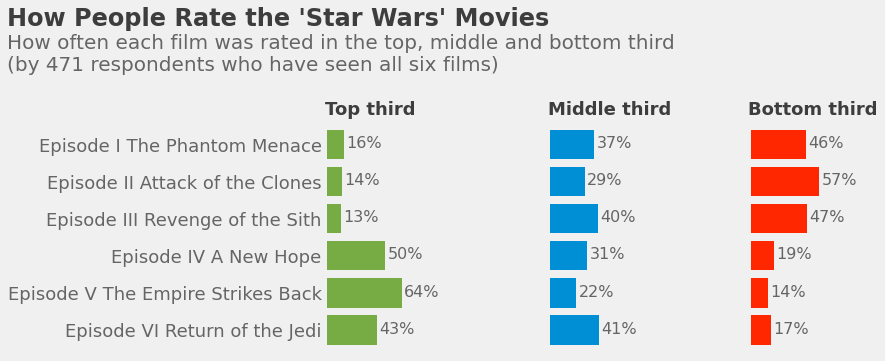

In [30]:
# Assign each columns in 'each_movie_rating_per' to the variables
top_movies = each_movie_rating_per['top_movies']
middle_movies = each_movie_rating_per['middle_movies']
bottom_movies = each_movie_rating_per['bottom_movies']

# Make a barh graph to visualize the results
fig, ax = plt.subplots(ncols=3, figsize=(8, 4), sharex=True)

# Create plot for 'top_movies'
top_movies.sort_index(ascending=False).plot(kind='barh', ax=ax[0], width=0.8, color='#77ab43')
ax[0].set_title('Top third', fontsize=18, fontweight='bold', color='#3d3d3d', loc='left')
ax[0].grid([])
ax[0].set_xticks([])
ax[0].set_yticks(ax[0].get_yticks(), fontsize=18, color='#656565', labels=ylabels[::-1])

# Set bar labels for top movies
barlabels_ycoords = 4.9

for bar in range(len(top_movies)):
    current_xcoord = int(top_movies.iloc[bar])
    current_label = str(current_xcoord)
    
    ax[0].text(x=current_xcoord+2, y=barlabels_ycoords, s=current_label+'%',
               fontsize=16, color='#656565')
    barlabels_ycoords -= 1

    
# Create plot for 'middle_movies'
middle_movies.sort_index(ascending=False).plot(kind='barh', ax=ax[1], width=0.8, color='#008fd5', left=40)
ax[1].set_title('Middle third', fontsize=18, fontweight='bold', color='#3d3d3d', loc='right', x=1.15)
ax[1].grid([])
ax[1].set_xticks([])
ax[1].set_yticks([])

# Set bar labels for middle movies
barlabels_ycoords = 4.9

for bar in range(len(middle_movies)):
    current_xcoord = int(middle_movies.iloc[bar])
    current_label = str(current_xcoord)
    
    ax[1].text(x=current_xcoord+42, y=barlabels_ycoords, s=current_label+'%',
               fontsize=16, color='#656565')
    barlabels_ycoords -= 1

    
# Create plot for 'bottom_movies'
bottom_movies.sort_index(ascending=False).plot(kind='barh', ax=ax[2], width=0.8, color='#ff2700', left=60)
ax[2].set_title('Bottom third', fontsize=18, fontweight='bold', color='#3d3d3d', loc='right', x=1.35)
ax[2].grid([])
ax[2].set_xticks([])
ax[2].set_yticks([])

# Set bar labels for bottom movies
barlabels_ycoords = 4.9

for bar in range(len(bottom_movies)):
    current_xcoord = int(bottom_movies.iloc[bar])
    current_label = str(current_xcoord)
    
    ax[2].text(x=current_xcoord+62, y=barlabels_ycoords, s=current_label+'%',
               fontsize=16, color='#656565')
    barlabels_ycoords -= 1
    
# Add main title
ax[0].text(x=-265, y=8.2, s='How People Rate the \'Star Wars\' Movies', fontsize=24, fontweight='bold', color='#3d3d3d')    

# Add subtitle
ax[0].text(x=-265, y=7, s='How often each film was rated in the top, middle and bottom third\n(by 471 respondents who have seen all six films)',
           fontsize=20, color='#656565')

plt.show()

The above chart shows how often each film was rated in the top third (best or second best), the middel third (third or fourth) or the bottom third (second worst or worst). It's a more nuanced take on the series.

### 4.5 Who is the Most Liked or Hated Character of All?

There are several characters in the Star Wars franchise. Some good, some bad, some neither, depending on where one stands with regards to morality.

Next, we'll analyze which characters fans loved versus those they found unfavorable. We'll categorize the rating of the 835 respondents into four subsets `Favorable`, `Neutral`, `Unfamiliar`, and `Unfavorable`, this should give us a clear picture of how popular/unpopular each character is.

In [31]:
# Count people favorite characters who have seen any movie and
# split the rating into 4 bins
fav_char_rating = seen_any_df[char_cols].apply(lambda x: x.value_counts(bins=4))

# Transpose columns to index in 'fav_char_rating'
fav_char_rating = fav_char_rating.T

# Rename columns names
col_names = ['Favorable', 'Neutral', 'Unfamiliar', 'Unfavorable']
fav_char_rating.set_axis(labels=col_names, axis='columns', inplace=True)

# Calculate the percentage in the 'fav_char_rating'
fav_char_rating_per = round(fav_char_rating / len(seen_any_df) * 100, 0)

# Display result in descending order by 'Favorable' column
fav_char_rating_per = fav_char_rating_per.sort_values(by='Favorable', ascending=False)
fav_char_rating_per

,Favorable,Neutral,Unfamiliar,Unfavorable
Luke Skywalker,92.0,5.0,1.0,2.0
Han Solo,91.0,5.0,2.0,1.0
Princess Leia Organa,91.0,6.0,1.0,2.0
Obi Wan Kenobi,90.0,5.0,2.0,2.0
Yoda,90.0,6.0,1.0,2.0
R2 D2,89.0,7.0,1.0,2.0
C-3PO,84.0,9.0,2.0,4.0
Anakin Skywalker,62.0,16.0,6.0,15.0
Darth Vader,57.0,10.0,1.0,30.0
Lando Calrissian,44.0,28.0,18.0,9.0


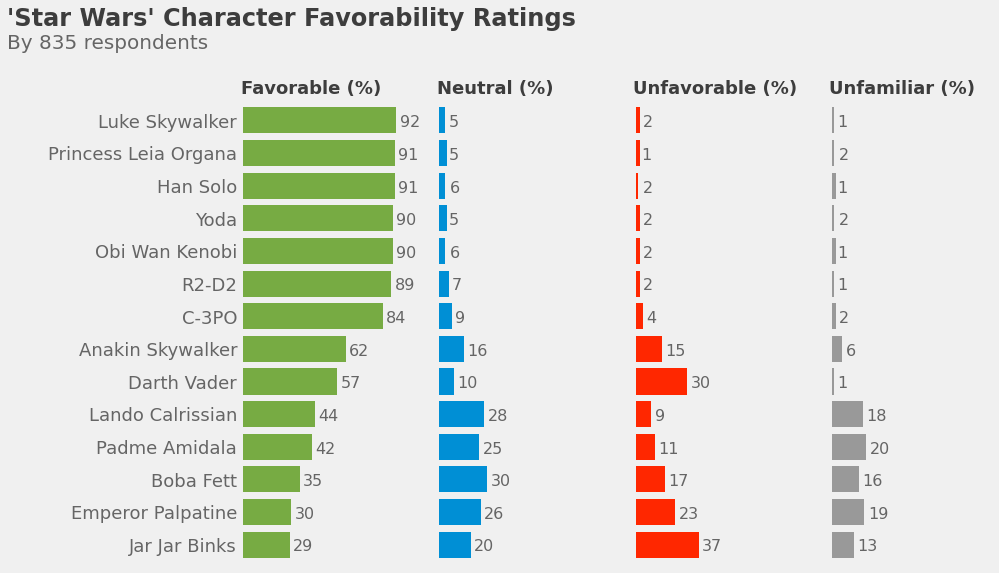

In [32]:
# Define figure and subplots with share x-axis
fig, ax = plt.subplots(ncols=4, figsize=(12, 8), sharex=True)

# Create plot for 'Favorable' characters
fav_char_rating_per.sort_values(by='Favorable').plot(kind='barh', y='Favorable', ax=ax[0], grid=False, legend=False,
                                                     width=0.8, color='#77ab43')
ax[0].set_title('Favorable (%)', fontsize=18, fontweight='bold', color='#3d3d3d', loc='left')
ax[0].set_xticklabels([])
# Create character labels for yticks
char_labels = ['Luke Skywalker', 'Princess Leia Organa', 'Han Solo', 'Yoda', 'Obi Wan Kenobi', 'R2-D2', 'C-3PO',
               'Anakin Skywalker', 'Darth Vader', 'Lando Calrissian', 'Padme Amidala', 'Boba Fett',
               'Emperor Palpatine', 'Jar Jar Binks']
# Set ytick labels
ax[0].set_yticklabels(labels=char_labels[::-1], fontsize=18, color='#656565')

# Add bar labels for Favorable characters
barlabels_ycoords = 12.8

for bar in range(len(fav_char_rating_per['Favorable'])):
    current_xcoord = int(fav_char_rating_per['Favorable'].iloc[bar])
    current_label = str(current_xcoord)
    
    ax[0].text(x=current_xcoord+2, y=barlabels_ycoords, s=current_label,
               fontsize=16, color='#656565')
    barlabels_ycoords -= 1

    
# Create plot for 'Neutral' characters
fav_char_rating_per.sort_values(by='Favorable').plot(kind='barh', y='Neutral', ax=ax[1], grid=False, legend=False,
                                                     width=0.8, color='#008fd5')
ax[1].set_title('Neutral (%)', fontsize=18, fontweight='bold', color='#3d3d3d', loc='left')
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

# Add bar labels for Neutral characters
barlabels_ycoords = 12.8

for bar in range(len(fav_char_rating_per['Neutral'])):
    current_xcoord = int(fav_char_rating_per['Neutral'].iloc[bar])
    current_label = str(current_xcoord)
    
    ax[1].text(x=current_xcoord+2, y=barlabels_ycoords, s=current_label,
               fontsize=16, color='#656565')
    barlabels_ycoords -= 1

    
# Create plot for 'Unfavorable' characters
fav_char_rating_per.sort_values(by='Favorable').plot(kind='barh', y='Unfavorable', ax=ax[2], grid=False, legend=False,
                                                     width=0.8, color='#ff2700', left=2)
ax[2].set_title('Unfavorable (%)', fontsize=18, fontweight='bold', color='#3d3d3d', loc='left')
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])

# Add bar labels for Unfavorable characters
barlabels_ycoords = 12.8

for bar in range(len(fav_char_rating_per['Unfavorable'])):
    current_xcoord = int(fav_char_rating_per['Unfavorable'].iloc[bar])
    current_label = str(current_xcoord)
    
    ax[2].text(x=current_xcoord+4, y=barlabels_ycoords, s=current_label,
               fontsize=16, color='#656565')
    barlabels_ycoords -= 1  

    
# Create plot for 'Unfamiliar' characters
fav_char_rating_per.sort_values(by='Favorable').plot(kind='barh', y='Unfamiliar', ax=ax[3], grid=False, legend=False,
                                                     width=0.8, color='#999999', left=2)
ax[3].set_title('Unfamiliar (%)', fontsize=18, fontweight='bold', color='#3d3d3d', loc='left')
ax[3].set_xticklabels([])
ax[3].set_yticklabels([])

# Add bar labels for Unfamiliar characters
barlabels_ycoords = 12.8

for bar in range(len(fav_char_rating_per['Unfamiliar'])):
    current_xcoord = int(fav_char_rating_per['Unfamiliar'].iloc[bar])
    current_label = str(current_xcoord)
    
    ax[3].text(x=current_xcoord+4, y=barlabels_ycoords, s=current_label,
               fontsize=16, color='#656565')
    barlabels_ycoords -= 1

# Add main title
ax[0].text(x=-138, y=15.9, s='\'Star Wars\' Character Favorability Ratings', fontsize=24, fontweight='bold', color='#3d3d3d')    

# Add subtitle
ax[0].text(x=-138, y=15.2, s='By 835 respondents', fontsize=20, color='#656565')    

plt.show()

Luke Skywalker is the most favorable character among fans while Jar Jar Binks is held to be the least favorable. Given the fact that Darth Vader is the antagonist, it is surprising to see that he is held in more favor than Jar Jar Binks. A lot of the hate that the character accrued was surprisingly from the original fans of the Star Wars franchise. Over time it became a characteristic to join the fan club.

Darth Vader seems to be a controversial character. Taking into consideration that he is from the dark side, many fans are still inclined to vote favorably toward him.

### 4.6 Han or Greedo: Who Shot First?

In one of the scenes in `Episode I The Phantom Menace` movie where the character Han Solo shoots the Greedo (an alien bounty hunter). The 1997 anniversary edition of the movie revised this scene to show that Greedo shot first and missed before Han Solo shot back in defense.

Let's see how fans reacted on the stocking surprise.

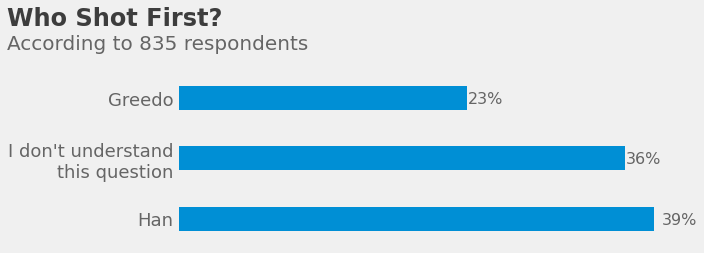

In [33]:
# Find percentage of 'Which character shot first?' column and
# calculate the ratio which character shot first
han_or_greedo = seen_any_df['Which character shot first?'].value_counts(normalize=True)*100

# Define figure and subplot
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1, 1, 1)

han_or_greedo.plot(kind='barh', ax=ax, width=0.4, grid=False)
ax.set_xticklabels([])
char_ylabels = ['Greedo', 'I don\'t understand\nthis question', 'Han']
ax.set_yticks(ax.get_yticks(), fontsize=18, color='#656565', labels=char_ylabels[::-1])

# Add bar labels for Unfamiliar characters
barlabels_ycoords = 1.91
# Access the length of 'han_or_greedo' in reversed order (for corresponding values of yticks)
for bar in reversed(range(len(han_or_greedo))):
    current_xcoord = int(han_or_greedo.iloc[bar])
    current_label = str(current_xcoord)
    
    ax.text(x=current_xcoord+0.9, y=barlabels_ycoords, s=current_label+'%',
               fontsize=16, color='#656565')
    barlabels_ycoords -= 1

# Add title
ax.text(x=-14, y=3.2, s='Who Shot First?', fontsize=24, fontweight='bold', color='#3d3d3d')    

# Add subtitle
ax.text(x=-14, y=2.8, s='According to 835 respondents', fontsize=20, color='#656565')  

plt.show()

It's clear that most fans still believe that Han shot first despite the [historical revisionism](http://en.wikipedia.org/wiki/Han_shot_first).

## 5. Conclusion

In this project, we had acquired a Star Wars survey data created by the fivethirtyeight team. We cleaned the dataset and proceeded to analyze the dataset to understand some of the thoughts Star Wars fans have towards the franchise.

After analyzing fan demographics we found that a majority of fans are males. We also found that all fans unanimously loved Star Wars `Episode V The Empire Strikes Back`. Further analysis also revealed that most fans preferred Darth Vader over Jar Jar Binks and that characters like Luke Skywalker, Han Solo, Yoda in addition to a few others are in almost equal favorable standing with fans. Finally most fans concluded that Han Solo shot first and not Greedo.

The primary purpose of the project was to clean the dataset in a manner that allows better analysis.